In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file=pd.read_csv(r'/home/abhishek/Documents/zomato-analysis/zomato.csv')
file

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


Text(0.5, 0, 'Number of Outlets')

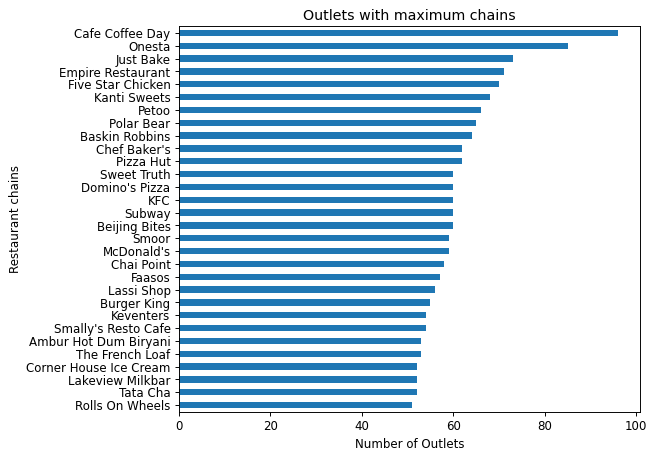

In [3]:
file.isnull().sum()        # showing total number of null values in each column 
df_rest_counts=pd.value_counts(file['name']).to_frame()     #Counting the number of Outlets in Bengaluru and converting it into dataframe
df_rest_counts
df_rest_counts.index.name = 'Restaurant Chains'     # renaming index to 'Restaurant Chains'
df_rest_counts.rename(columns = {'name':'Number of Outlets'},inplace = True)    # renaming column name from 'name' to 'Number of Outlets'
df_rest_counts
rest_top30 = df_rest_counts.iloc[0:30].sort_values('Number of Outlets')
rest_top30
from matplotlib.pyplot import figure
plt.figure(figsize=(7, 6), dpi=85)
rest_top30 ['Number of Outlets'].plot(kind="barh")
plt.title("Outlets with maximum chains")
plt.ylabel("Restaurant chains")
plt.xlabel("Number of Outlets")

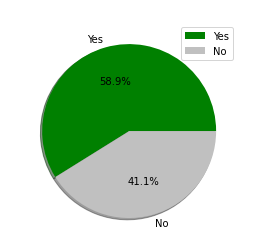

In [4]:
# RESTAURANTS NOT ACCEPTING ONLINE ORDERS
online_orders=pd.value_counts(file['online_order']).to_frame()
online_orders
rest_orders=[30444,21273]
online_orders.index.name = 'Yes/No'     # renaming index to 'Yes/No'
onl_ord=online_orders.transpose()
onl_ord
my_labels = ['Yes', 'No']
my_legends=['Restaurants accepting online orders','Restaurants not accepting online orders']
my_colors = ['Green','silver']
plt.pie(rest_orders, labels=my_labels,autopct='%1.1f%%', shadow = True, colors=my_colors)
plt.title('Resaturants acceptance of online orders',color='white')
plt.legend(loc=0)
plt.show()



In [5]:
# RATINGS DISTRIBUTION

In [6]:
# Extract the ratings
df_rating=file['rate'].to_frame() 

In [7]:
print(df_rating)

         rate
0       4.1/5
1       4.1/5
2       3.8/5
3       3.7/5
4       3.8/5
...       ...
51712  3.6 /5
51713     NaN
51714     NaN
51715  4.3 /5
51716  3.4 /5

[51717 rows x 1 columns]


In [8]:
# Removing Nan values from dataframe
df_rating.dropna(axis=0,inplace=True)
# Removing new restaurants which have no ratings and are marked as 'NEW'
df_rating.drop(df_rating[df_rating['rate']=='NEW'].index,inplace=True)
df_rating

,rate
0,4.1/5
1,4.1/5
2,3.8/5
3,3.7/5
4,3.8/5
...,...
51709,3.7 /5
51711,2.5 /5
51712,3.6 /5
51715,4.3 /5


In [9]:
df_rating.isnull().sum()

rate    0
dtype: int64

In [10]:
rate_col=df_rating["rate"]  #converting to series   
print(rate_col)
type(rate_col)

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51709    3.7 /5
51711    2.5 /5
51712    3.6 /5
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 41734, dtype: object


pandas.core.series.Series

In [11]:
new_set1=[]     
for x in rate_col:           # Removing "/5" from all values from rate column
    new_set=x.replace("/5", "")
    new_set1.append(new_set)
type(new_set1)

list

In [12]:
rate_df= pd.DataFrame(new_set1, columns = ['ratings']).sort_values('ratings') # Sorting rate columns in asc order 


In [13]:
# Cleaning the restaurants with '-' values.
# Removing new restaurants which have no ratings and have ratings as '-'
rate_df.drop(rate_df[rate_df['ratings']=='-'].index,inplace=True)

In [14]:
rate_df.sort_values('ratings')

,ratings
10073,1.8
5138,1.8
35076,1.8
39138,1.8
31256,1.8
...,...
34141,4.9
28166,4.9
24808,4.9
40483,4.9


In [15]:
rate_df = pd.DataFrame(rate_df, columns=['ratings'])
rate_df
type(rate_df)

pandas.core.frame.DataFrame

In [16]:
print(rate_df)

      ratings
10073     1.8
5138      1.8
35076    1.8 
39138    1.8 
31256    1.8 
...       ...
30166    4.9 
41201    4.9 
25957    4.9 
24808    4.9 
8258     4.9 

[41665 rows x 1 columns]


In [17]:
rate_df=rate_df.squeeze()

In [18]:
type(rate_df)

pandas.core.series.Series

In [19]:
rate_df= rate_df.astype(str)

In [20]:
rate_df

10073     1.8
5138      1.8
35076    1.8 
39138    1.8 
31256    1.8 
         ... 
30166    4.9 
41201    4.9 
25957    4.9 
24808    4.9 
8258     4.9 
Name: ratings, Length: 41665, dtype: object

In [21]:
rate_df=rate_df.to_frame()
type(rate_df)

pandas.core.frame.DataFrame

In [22]:
rate_df

,ratings
10073,1.8
5138,1.8
35076,1.8
39138,1.8
31256,1.8
...,...
30166,4.9
41201,4.9
25957,4.9
24808,4.9


In [23]:
for ratings in rate_df:
    print(rate_df[ratings].unique())

['1.8' '1.8 ' '2.0' '2.0 ' '2.1' '2.1 ' '2.2' '2.2 ' '2.3' '2.3 ' '2.4'
 '2.4 ' '2.5' '2.5 ' '2.6' '2.6 ' '2.7' '2.7 ' '2.8' '2.8 ' '2.9' '2.9 '
 '3.0' '3.0 ' '3.1' '3.1 ' '3.2' '3.2 ' '3.3' '3.3 ' '3.4' '3.4 ' '3.5'
 '3.5 ' '3.6' '3.6 ' '3.7' '3.7 ' '3.8' '3.8 ' '3.9' '3.9 ' '4.0' '4.0 '
 '4.1' '4.1 ' '4.2' '4.2 ' '4.3' '4.3 ' '4.4' '4.4 ' '4.5' '4.5 ' '4.6'
 '4.6 ' '4.7' '4.7 ' '4.8' '4.8 ' '4.9' '4.9 ']


In [24]:
rate_df["ratings"] = pd.to_numeric(rate_df["ratings"], downcast="float")

In [25]:
mean=rate_df['ratings'].mean()     # Mean ---> 3.700500249862671
median=rate_df['ratings'].median()   # Median ---> 3.700000047683716
mode=rate_df['ratings'].mode().values[0]    # Mode ---> 3.9

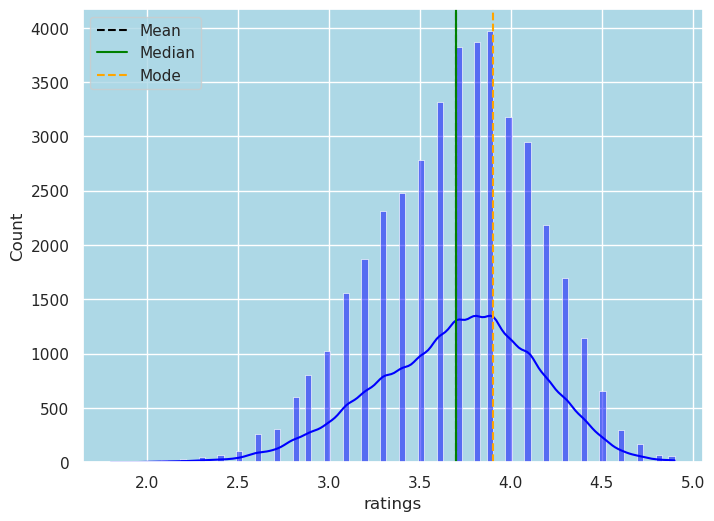

In [26]:
# plotting Histogram for restaurant ratings along with Kernel density estimation
from matplotlib.pyplot import figure  
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(8,6), dpi=100)

g1=sns.histplot(data=rate_df, x="ratings", stat='count',kde="True",color="blue")
g1.axvline(mean, color='black',ls='--',label="Mean")
g1.axvline(median, color='green',ls='-',label="Median")
g1.axvline(mode, color='orange',ls='--',label="Mode")
g1.legend(loc='upper left')

plt.show()



In [27]:
type(g1)

matplotlib.axes._subplots.AxesSubplot

In [28]:
#MOST COMMON RESTAURANT TYPE IN BENGALURU

In [29]:
rest_type_counts=pd.value_counts(file['rest_type']).to_frame()     #Counting the number of Outlets in Bengaluru and converting it into dataframe
rest_type_counts
rest_type= rest_type_counts.iloc[0:30].sort_values('rest_type')
rest_type

,rest_type
"Casual Dining, Pub",127
"Microbrewery, Casual Dining",132
"Bakery, Dessert Parlor",147
"Cafe, Dessert Parlor",148
"Cafe, Bakery",164
"Cafe, Casual Dining",173
"Dessert Parlor, Cafe",175
Kiosk,176
"Sweet Shop, Quick Bites",178
"Pub, Casual Dining",255


Text(0.5, 0, 'Count')

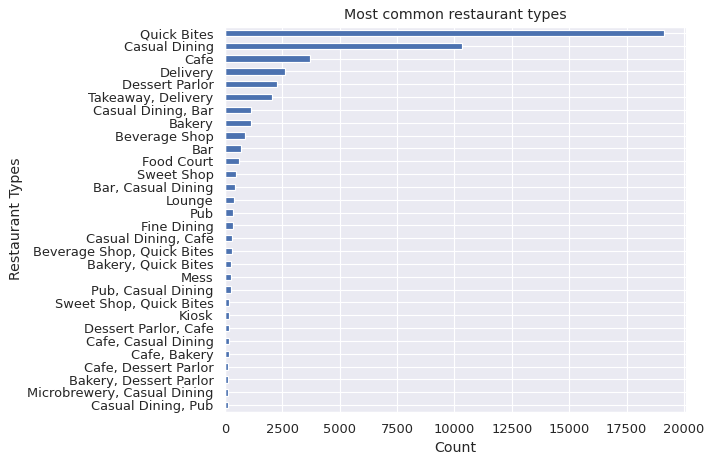

In [30]:
#PLOTTING HORIZONTAL BAR GRAPH FOR MOST COMMON RESTAURANT TYPES

from matplotlib.pyplot import figure
plt.figure(figsize=(7, 6), dpi=85)
sns.set_style("dark")
sns.set(rc={ 'figure.facecolor':'white'})

rest_type ['rest_type'].plot(kind="barh")
plt.title("Most common restaurant types")
plt.ylabel("Restaurant Types")
plt.xlabel("Count")



In [31]:
# MOST POPULAR CUSINES IN BENGALURU

In [32]:
cuisines_counts=pd.value_counts(file['cuisines']).to_frame()     # Most famous cuisines in Bengaluru
cuisines= cuisines_counts.iloc[0:30].sort_values('cuisines')
cuisines.index.name = 'cuisines type' 
cuisines.rename(columns = {'cuisines':'Number'},inplace = True) 

In [33]:
cuisines

,Number
cuisines type,
"Chinese, Momos",238
"South Indian, Biryani",248
"Beverages, Fast Food",248
"South Indian, Chinese",254
Street Food,257
"Desserts, Beverages",265
"Biryani, North Indian",269
Finger Food,269
"Biryani, Kebab",279


Text(0.5, 0, 'Count')

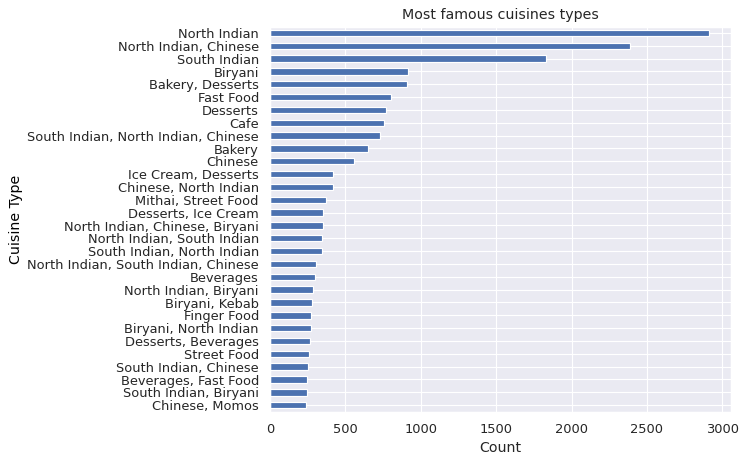

In [34]:
from matplotlib.pyplot import figure
plt.figure(figsize=(7, 6), dpi=85)
sns.set_style("dark")
sns.set(rc={'figure.facecolor':'white'})

cuisines['Number'].plot(kind="barh")
plt.title("Most famous cuisines types")
plt.ylabel("Cuisine Type",color="black")
plt.xlabel("Count")


In [35]:
# COST FACTOR ANALYSIS

In [36]:
cost_df=file.loc[:,('rate','approx_cost(for two people)')]
cost_df

,rate,approx_cost(for two people)
0,4.1/5,800.0
1,4.1/5,800.0
2,3.8/5,800.0
3,3.7/5,300.0
4,3.8/5,600.0
...,...,...
51712,3.6 /5,1500.0
51713,NaN,600.0
51714,NaN,2000.0
51715,4.3 /5,2500.0


In [37]:
cost_df.isnull().sum()

rate                           7775
approx_cost(for two people)     346
dtype: int64

In [38]:
# Removing new restaurants which have no ratings and are marked as 'NEW'

cost_df.drop(cost_df[cost_df['rate']=='NEW'].index,inplace=True)

# Removing new restaurants which have no ratings and marked as '-'

cost_df.drop(cost_df[cost_df['rate']=='-'].index,inplace=True)

# Removing new restaurants which have no ratings as Nan

cost_df.dropna(axis=0,inplace=True) 


In [39]:
cost_df

,rate,approx_cost(for two people)
0,4.1/5,800.0
1,4.1/5,800.0
2,3.8/5,800.0
3,3.7/5,300.0
4,3.8/5,600.0
...,...,...
51709,3.7 /5,800.0
51711,2.5 /5,800.0
51712,3.6 /5,1500.0
51715,4.3 /5,2500.0


In [40]:
cost_rate=cost_df["rate"] # rate column to series for data cleaning
print(cost_rate)
type(cost_rate)


0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51709    3.7 /5
51711    2.5 /5
51712    3.6 /5
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 41418, dtype: object


pandas.core.series.Series

In [41]:
cost_rate = cost_rate.astype(str).replace('/5','', regex=True)

In [42]:

#cost_rate = cost_rate.replace('/5','', regex=True)

In [43]:
type(cost_rate)

pandas.core.series.Series

In [44]:
cost_rate=cost_rate.to_frame()



In [45]:
cost_rate["rate"] = pd.to_numeric(cost_rate["rate"], downcast="float")

In [46]:
cost_df['rate'] = cost_rate['rate']

In [47]:
type(cost_df)

pandas.core.frame.DataFrame

In [48]:
cost_df

,rate,approx_cost(for two people)
0,4.1,800.0
1,4.1,800.0
2,3.8,800.0
3,3.7,300.0
4,3.8,600.0
...,...,...
51709,3.7,800.0
51711,2.5,800.0
51712,3.6,1500.0
51715,4.3,2500.0


In [49]:
cost_df.isnull().sum()

rate                           0
approx_cost(for two people)    0
dtype: int64

In [50]:
cost_df.sort_values('rate',inplace=True) # Sorting rate columns in asc order 


In [51]:
cost_df

,rate,approx_cost(for two people)
12540,1.8,1200.0
48390,1.8,1200.0
38870,1.8,1200.0
43489,1.8,1200.0
6300,1.8,1200.0
...,...,...
29271,4.9,1500.0
38457,4.9,400.0
19393,4.9,1600.0
12380,4.9,400.0


In [52]:
cost_df.isnull().any()

rate                           False
approx_cost(for two people)    False
dtype: bool

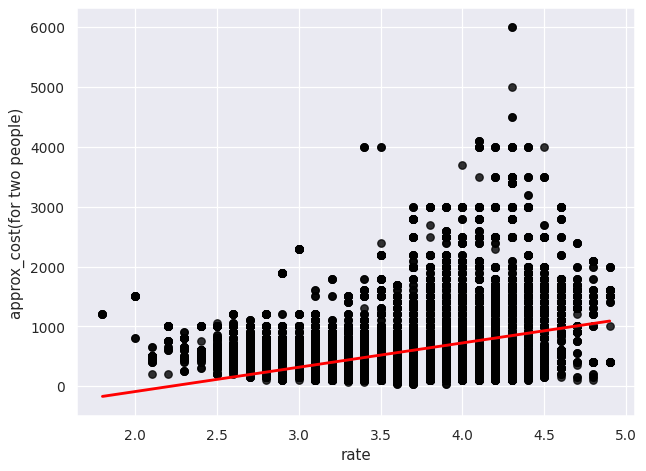

In [53]:
plt.figure(figsize=(8,6),dpi=90)
plot_cost_df=sns.regplot(x = "rate", y = "approx_cost(for two people)", data = cost_df, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()


In [54]:
# FINDING CORRELATION COEFFICIENT
correlation_df = cost_df.corr()  
correlation_df         # Weak positive correlation of .385 between restaurants ratings and cost for 2 people 


,rate,approx_cost(for two people)
rate,1.000000,0.385183
approx_cost(for two people),0.385183,1.000000


In [55]:
# COST DISTRIBUTION FOR 2 PEOPLE

In [56]:
x=np.sort(cost_df['approx_cost(for two people)'])

In [57]:
mean_costfor2= round(np.mean(x),2)     
median_costfor2= np.median(x)
print(f"The mean approximate cost for two people is {mean_costfor2} for a single meal.")
print(f"The median approximate cost for two people is {median_costfor2} for a single meal.")


The mean approximate cost for two people is 603.27 for a single meal.
The median approximate cost for two people is 500.0 for a single meal.


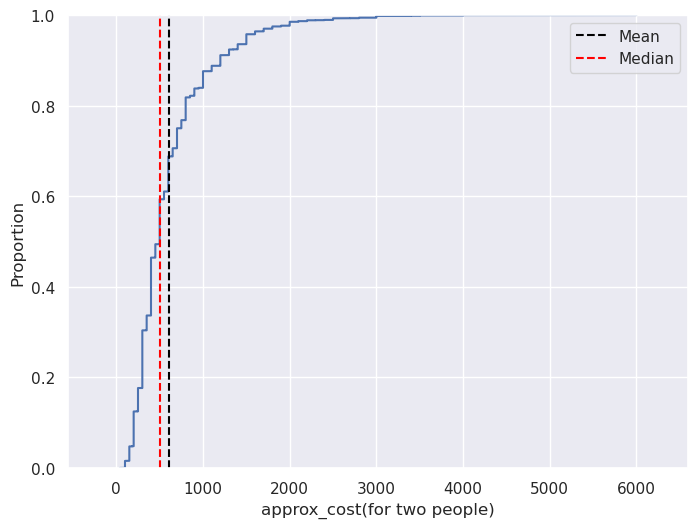

In [58]:
from matplotlib.pyplot import figure as fig
plt.figure(figsize=(8,6), dpi=100)

fig_cdf=sns.ecdfplot(x='approx_cost(for two people)',data=cost_df)
fig_cdf.axvline(mean_costfor2, color='black',ls='--',label="Mean")
fig_cdf.axvline(median_costfor2, color='red',ls='--',label="Median")
plt.margins(0.10)
fig_cdf.legend(loc='upper right')
plt.show()


# From the graph below we can see that more than 60% of the restaurants (on average) charges around ₹ 600 for 2 people meal.

/home/abhishek/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


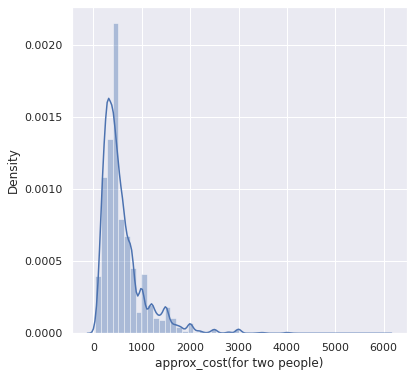

In [59]:
plt.figure(figsize=(6,6))
sns.distplot(cost_df['approx_cost(for two people)'])
plt.show()

#  We can see that the distribution if left skewed.
# This means almost 90 percent of restaurants serve food for budget less than 1000 INR

In [60]:
# Plotting heatmps on OpenStreetMaps 

In [61]:
#import geopy as gp
#import geopandas as gpd
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent = "myGeolocator")
#file['loc'] =file["address"].apply(geolocator.geocode)
#file["point"]= file["loc"].apply(lambda loc: tuple(loc.point) if loc else None)
#file[['lat', 'lon']] = pd.DataFrame(file['point'].to_list(), index=df.index)
#data=file.copy()
#data_sample= data.sample(frac=0.05)
#data_sample.shape
#import urllib
#import requests
#def geocode2(address):
#    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
#    response = requests.get(url).json()
#    if(len(response)!=0):
#        return(response[0]['lat'], response[0]['lon'])
#    else:
#        return('-1')

#data_sample['geocoded'] = data_sample['address'].apply(geocode2)

In [122]:
#  WORDCLOUD

In [125]:
from wordcloud import wordcloud


In [133]:
word_df=file.copy()

In [134]:
word_df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [135]:
word_df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [143]:
word_df=word_df.dropna(subset=['rest_type', 'dish_liked'])

In [144]:
word_df.isnull().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                            30
votes                            0
phone                          337
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)    134
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [145]:
word_df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,https://www.zomato.com/bangalore/izakaya-gastr...,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,+91 7625087121\n+91 8050587483,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [154]:
# Combine all cuisines type into one text and create a single cloud
text = " ".join(type for type in word_df.cuisines)
print ("There are {} words in the combination of all review.".format(len(text)))


There are 670113 words in the combination of all review.


In [155]:
wordcloud= WordCloud().generate(text)

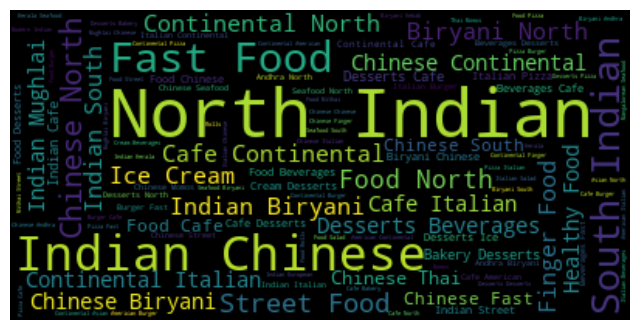

In [162]:
from matplotlib.pyplot import figure as fig
plt.figure(figsize=(8,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()  #Creates word cloud by cuisine types